In [1]:
# import the data
import numpy as np
from sklearn.datasets import load_boston


In [2]:
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
#the shape of the input data array
data= boston.data

# the target is the house prices
target = boston.target

print(data.shape)
print(target.shape)
print(boston.feature_names)



(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
num_features = len(boston.feature_names)
num_samples = data.shape[0] # 506 training examples

In [5]:
# Use Pandas to get an overview of the training data
import pandas as pd

bos_dataframe = pd.DataFrame(boston.data)
bos_dataframe.columns = boston.feature_names
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# add the prices:
bos_dataframe['PRICE'] = target
bos_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# now on to the machine learning part. Initalize weights between -1 and 1
weights_init = np.random.uniform(low=-1, high=1, size=num_features)
print(weights_init)


[-0.85549975 -0.56171189 -0.63602559  0.14291017 -0.13070656  0.87304665
 -0.48260847 -0.72458258  0.2336582  -0.73910614  0.25093199 -0.62529188
 -0.65381234]


In [10]:
# initialize the bias to 0
bias_init = 0

In [11]:
# Normalizing data to make it easier to seek relations - for each feature, calculate mean and max.
for i in range(num_features):
    feature_avg = np.mean(data[:, i])
    feature_max = np.amax(data[:, i])
    # subtract mean, divide by max:
    data[:, i] = (data[:, i] - feature_avg)/feature_max

In [12]:
# Hypothesis function is an output vector of predicted prices
def hypothesis(weights, bias):
    return data.dot(weights) + np.repeat(bias, num_samples) #np.repeat returns an array of repeated values


In [13]:
hypothesis(weights_init, bias_init).shape

(506,)

In [19]:
# defining the cost function, which is mean-squared error
def cost_func(weights, bias):
    return np.mean(np.square(hypothesis(weights, bias) - target))/2 #we divide by two to make math easier

print("The cost is quite high!")
print(cost_func(weights_init, bias_init))


The cost is quite high!
294.095814985


In [22]:
# gradient descent: return the weight gradient vector and bias gradient at current step

def gradient(weights, bias):
    weight_gradients = []
    
    for (weight_num, weight) in enumerate(weights):
        grad = np.mean((hypothesis(weights, bias)-target) * data[:, weight_num])
        weight_gradients.append(grad)
    
    weight_gradients = np.array(weight_gradients)
    
    bias_gradient = np.mean(hypothesis(weights, bias) - target)
    
    return (weight_gradients, bias_gradient)

    

In [23]:
# Check to make sure it works
# Initial gradient should be large

gradient(weights_init, bias_init)

(array([ 0.3240582 , -0.76301408,  1.03712545, -0.39737053,  0.49483994,
        -0.49433253,  0.91714099, -0.37745432,  1.20249374,  0.96149092,
         0.44798758, -0.69975627,  1.22318975]), -22.532806324110673)

In [28]:
# Training the model: the cost should decrease over time

alpha = 0.01 #the learning rate

def gradient_descent(weights, bias, num_epochs):
    costs = []
    weights = weights
    bias = bias
    
    for i in range(num_epochs):
        weights_gradient, bias_gradient = gradient(weights, bias)
        
        weights = weights - alpha * weights_gradient
        bias = bias - alpha * bias_gradient
        costs.append(cost_func(weights, bias))
        
    return costs, weights, bias

In [29]:
costs, trained_weights, trained_bias = gradient_descent(weights_init, bias_init, 1000)


In [30]:
print(trained_weights)
print(trained_bias)

[-2.16041263  2.3461917  -4.04902262  3.05350476 -1.51995452  4.51072371
 -2.63619734 -1.14694654 -1.92419136 -3.55148384 -2.47950735  2.16254381
 -7.8011969 ]
22.5318335548


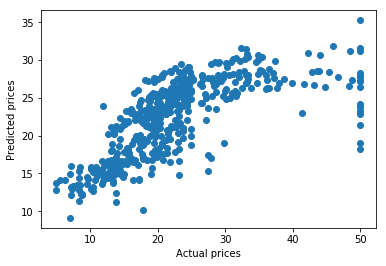

In [32]:
# make sure the predicted prixes and actual values are correlated:
import matplotlib.pyplot as plt

new_hypotheses = hypothesis(trained_weights, trained_bias)

plt.scatter(target, new_hypotheses)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

In [39]:
# calculating the accuracy of our model:
print(cost_func(trained_weights, trained_bias))

22.5922948071
